In [53]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates  
from sklearn import linear_model
from tensorflow.keras.models import Sequential 
from keras.layers import Dense  
import keras.backend as K 
from keras.callbacks import EarlyStopping  
from keras.optimizers import Adam 
from keras.models import load_model 
from keras.layers import LSTM  
from keras.utils.vis_utils import plot_model  



ModuleNotFoundError: No module named 'tensorflow'

In [24]:
# Define the ticker symbol for the company (e.g., Apple Inc. with the symbol AAPL)
ticker_symbol = "AAPL"


start_date = "1990-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetch the historical stock data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Create a DataFrame from the fetched data
df = pd.DataFrame(data)

# Display the DataFrame
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.263761,183198400
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.265531,207995200
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.266417,221513600
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.267302,123312000
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269072,101572800
...,...,...,...,...,...,...
2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900
2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300
2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100


<Axes: xlabel='Date'>

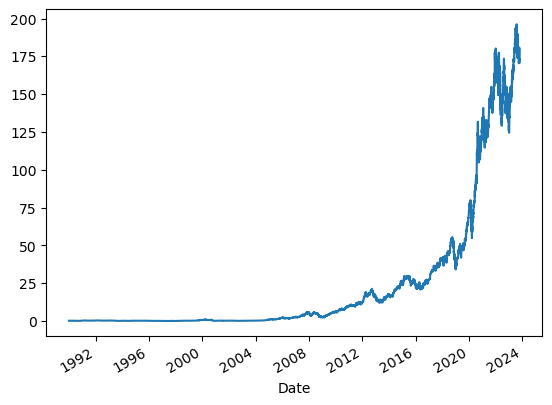

In [26]:
df["Adj Close"].plot()


In [38]:
#Set Target Variable
output_var = pd.DataFrame(df["Adj Close"])

#Selecting the Features
features = ["Open", "High", "Low", "Volume"]

In [43]:
# Scale the data 

scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.001019,0.001093,0.001018,0.024369
1990-01-03,0.001144,0.001115,0.001132,0.027712
1990-01-04,0.001155,0.001149,0.001121,0.029534
1990-01-05,0.001132,0.001127,0.001109,0.016298
1990-01-08,0.001121,0.001115,0.001109,0.013367


In [44]:
# Split to training and testing set

timesplit=TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [47]:
# Finally, we need to transform the data into the format that the model can process 

trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [48]:
# Build the LSTM Model 

lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

SyntaxError: invalid character in identifier (516283375.py, line 4)